In [1]:
# Import required libraries
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Enable inline plotting
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load CM1 dataset
import os

# Check current directory
print("Current directory:", os.getcwd())

# Try to load the dataset
try:
    # Adjust path based on where your notebook is
    # If notebook is in notebooks folder: use '../data/raw/PROMISE/cm1.arff'
    # If notebook is in root folder: use 'data/raw/PROMISE/cm1.arff'
    
    data, meta = arff.loadarff('../data/raw/PROMISE/cm1.arff')
    df = pd.DataFrame(data)
    print("✅ Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(f"Number of samples: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")
except FileNotFoundError:
    print("❌ ERROR: File not found!")
    print("Trying alternative path...")
    try:
        data, meta = arff.loadarff('data/raw/PROMISE/cm1.arff')
        df = pd.DataFrame(data)
        print("✅ Dataset loaded successfully with alternative path!")
        print(f"Dataset shape: {df.shape}")
    except:
        print("❌ Still not found. Let's check what files exist:")
        print(os.listdir('data/raw/PROMISE/'))
except Exception as e:
    print(f"❌ ERROR: {e}")

Current directory: C:\DefectPrediction\notebooks
✅ Dataset loaded successfully!
Dataset shape: (498, 22)
Number of samples: 498
Number of features: 22


In [3]:
# Display first 5 rows
print("=" * 80)
print("FIRST 5 ROWS OF DATA:")
print("=" * 80)
print(df.head())
print("\n")
print("=" * 80)
print("LAST 5 ROWS OF DATA:")
print("=" * 80)
print(df.tail())

FIRST 5 ROWS OF DATA:
    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e     b  \
0   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30     1.30  1.30   
1   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00     1.00  1.00   
2  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  2936.77  0.10   
3  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  3447.89  0.07   
4  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  5999.58  0.12   

        t  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0    1.30     2.0        2.0      2.0                2.0      1.2        1.2   
1    1.00     1.0        1.0      1.0                1.0      1.0        1.0   
2  163.15     1.0        0.0      6.0                0.0     15.0       15.0   
3  191.55     0.0        0.0      3.0                0.0     16.0        8.0   
4  333.31     0.0        0.0      3.0                0.0     16.0       12.0   

   total_Op  tot

In [4]:
# Get detailed information
print("=" * 80)
print("DATASET INFORMATION:")
print("=" * 80)
print(df.info())
print("\n")
print("=" * 80)
print("COLUMN NAMES:")
print("=" * 80)
print(df.columns.tolist())

DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    float64
 13  lOComment          498 non-null    float64
 14  lOBlank            498 non-null    float64
 15  locCodeAndComment  498 non-null    float64
 16  uniq_

In [5]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES CHECK:")
print("=" * 80)

missing_count = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing_Count': missing_count.values,
    'Missing_Percent': missing_percent.values
})

# Show only columns with missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df) == 0:
    print("✅ No missing values found!")
else:
    print("⚠️ Columns with missing values:")
    print(missing_df.to_string(index=False))
    print(f"\nTotal columns with missing values: {len(missing_df)}")

MISSING VALUES CHECK:
✅ No missing values found!


In [6]:
# Find the target column (defect label)
print("=" * 80)
print("IDENTIFYING TARGET COLUMN:")
print("=" * 80)

# The last column is usually the target
target_col = df.columns[-1]
print(f"Last column name: {target_col}")
print(f"Data type: {df[target_col].dtype}")
print("\n")

# Check unique values in target column
print("Unique values in target column:")
print(df[target_col].unique())
print(f"\nNumber of unique values: {df[target_col].nunique()}")

IDENTIFYING TARGET COLUMN:
Last column name: class
Data type: object


Unique values in target column:
[b'false' b'true']

Number of unique values: 2


In [7]:
# Convert byte strings to regular strings if needed
print("=" * 80)
print("CONVERTING DATA TYPES:")
print("=" * 80)

# Check if target column has byte strings
if df[target_col].dtype == object:
    print(f"Converting '{target_col}' from bytes to strings...")
    df[target_col] = df[target_col].astype(str)
    df[target_col] = df[target_col].str.replace("b'", "").str.replace("'", "")
    print(f"✅ Converted!")
    print(f"New unique values: {df[target_col].unique()}")
else:
    print("✅ Target column is already numeric")

print(f"\nTarget column values:")
print(df[target_col].value_counts())

CONVERTING DATA TYPES:
Converting 'class' from bytes to strings...
✅ Converted!
New unique values: ['false' 'true']

Target column values:
class
false    449
true      49
Name: count, dtype: int64


In [8]:
# Detailed class distribution analysis
print("=" * 80)
print("CLASS DISTRIBUTION ANALYSIS:")
print("=" * 80)

value_counts = df[target_col].value_counts()
print("\nCounts:")
print(value_counts)
print("\n")

# Calculate percentages
total = len(df)
print("Detailed Breakdown:")
print("-" * 50)
for label, count in value_counts.items():
    pct = (count/total) * 100
    print(f"{label:15s}: {count:4d} samples ({pct:6.2f}%)")

print("-" * 50)
print(f"{'Total':15s}: {total:4d} samples (100.00%)")

# Calculate imbalance ratio
counts = value_counts.values
imbalance_ratio = max(counts) / min(counts)
print(f"\n📊 Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 5:
    print("⚠️ WARNING: Dataset is highly imbalanced!")
    print("   We'll need to use techniques like SMOTE or class weights.")
elif imbalance_ratio > 2:
    print("⚠️ Dataset is moderately imbalanced.")
else:
    print("✅ Dataset is reasonably balanced.")

CLASS DISTRIBUTION ANALYSIS:

Counts:
class
false    449
true      49
Name: count, dtype: int64


Detailed Breakdown:
--------------------------------------------------
false          :  449 samples ( 90.16%)
true           :   49 samples (  9.84%)
--------------------------------------------------
Total          :  498 samples (100.00%)

📊 Imbalance Ratio: 9.16:1
⚠️ WARNING: Dataset is highly imbalanced!
   We'll need to use techniques like SMOTE or class weights.


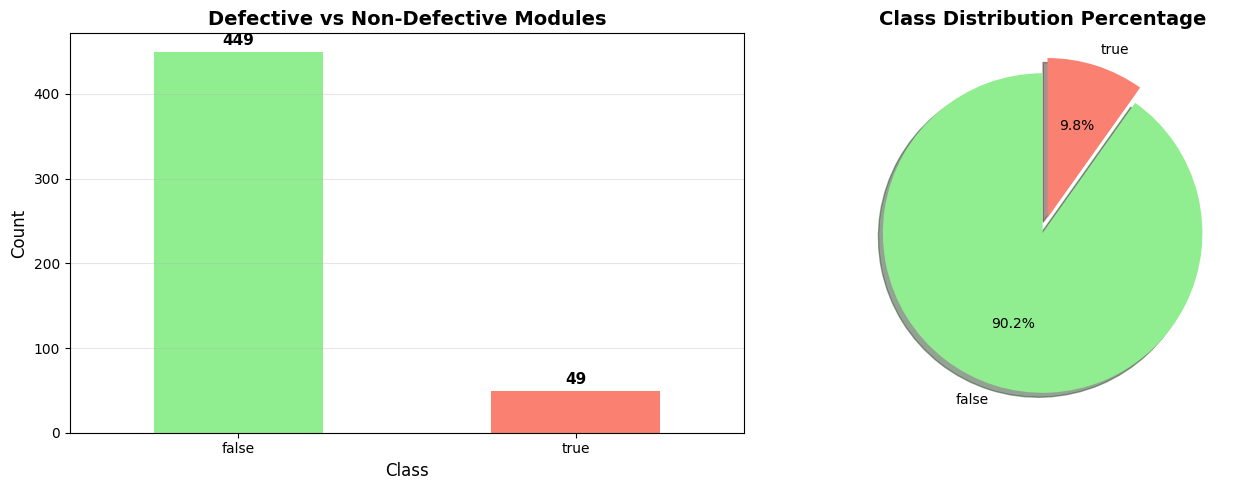

✅ Visualization complete!


In [9]:
# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
value_counts.plot(kind='bar', ax=axes[0], color=['lightgreen', 'salmon'])
axes[0].set_title('Defective vs Non-Defective Modules', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(value_counts.values):
    axes[0].text(i, v + max(value_counts.values)*0.02, str(v), 
                 ha='center', fontweight='bold', fontsize=11)

# Pie chart
colors = ['lightgreen', 'salmon']
explode = (0, 0.1)  # Explode the defective slice
axes[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, explode=explode, shadow=True)
axes[1].set_title('Class Distribution Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualization complete!")

In [10]:
# Get statistical summary of numerical features
print("=" * 80)
print("STATISTICAL SUMMARY (First 10 features):")
print("=" * 80)

# Get only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target if it's numeric
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

# Display statistics for first 10 features
if len(numeric_cols) > 0:
    print(df[numeric_cols[:10]].describe().T)
    print(f"\nTotal numeric features: {len(numeric_cols)}")
else:
    print("No numeric features found (unexpected!)")

STATISTICAL SUMMARY (First 10 features):
       count          mean            std  min     25%      50%         75%  \
loc    498.0     29.644779      42.753572  1.0    8.00    17.00     31.0000   
v(g)   498.0      5.382329       8.347359  1.0    1.00     3.00      6.0000   
ev(g)  498.0      2.490763       3.658847  1.0    1.00     1.00      1.0000   
iv(g)  498.0      3.528916       5.464398  1.0    1.00     2.00      4.0000   
n      498.0    143.956426     221.049888  1.0   25.00    67.50    151.7500   
v      498.0    900.175823    1690.814334  0.0  102.19   329.82    861.4600   
l      498.0      0.146325       0.159337  0.0    0.05     0.09      0.1775   
d      498.0     15.829378      15.330960  0.0    5.63    11.64     21.1425   
i      498.0     38.455361      36.996297  0.0   16.21    27.40     46.9000   
e      498.0  34884.932329  134164.665592  0.0  606.17  3677.62  16633.3375   

              max  
loc        423.00  
v(g)        96.00  
ev(g)       30.00  
iv(g)    

FEATURE CORRELATION ANALYSIS:


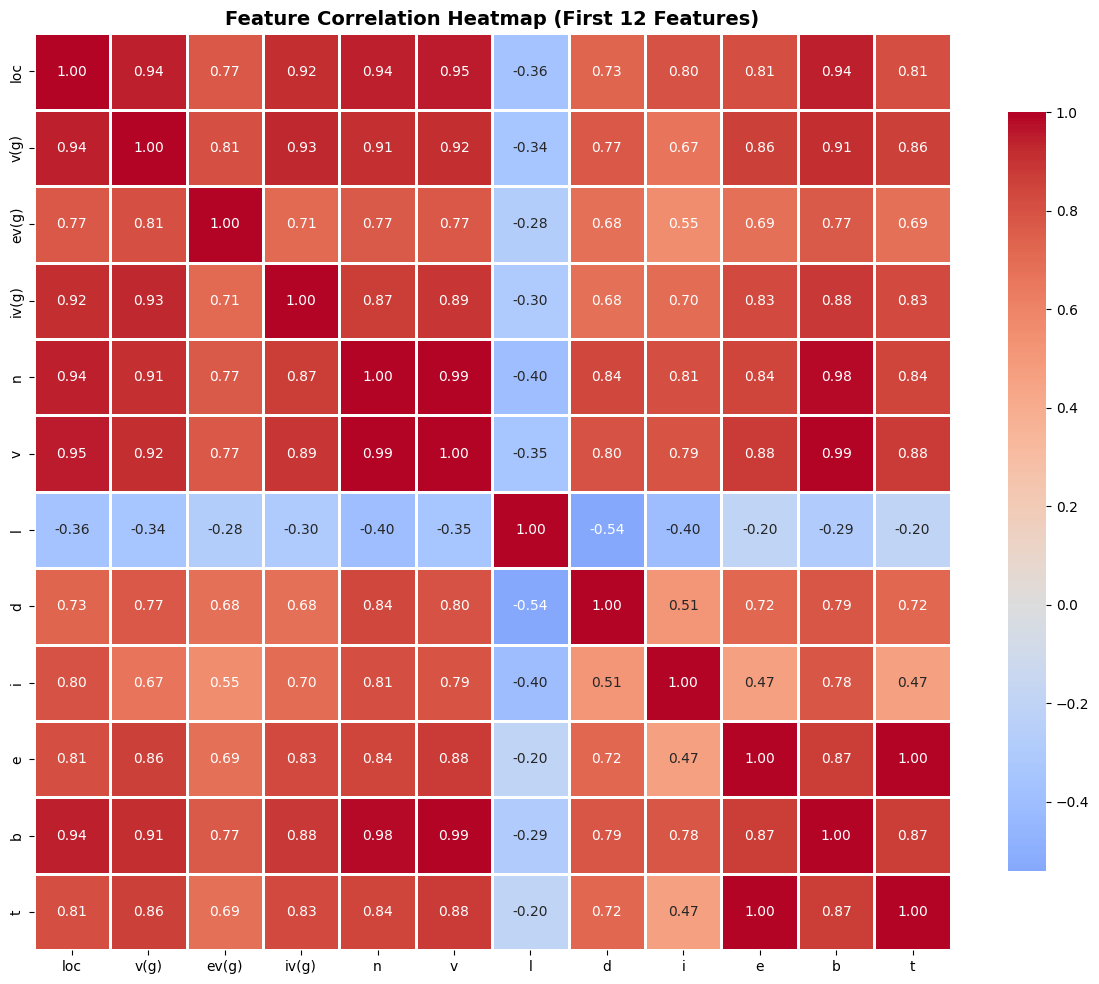


🔍 Highly Correlated Feature Pairs (correlation > 0.8):
  • loc ↔ v(g): 0.943
  • loc ↔ iv(g): 0.919
  • loc ↔ n: 0.940
  • loc ↔ v: 0.953
  • loc ↔ e: 0.815
  • loc ↔ b: 0.943
  • loc ↔ t: 0.815
  • v(g) ↔ ev(g): 0.807
  • v(g) ↔ iv(g): 0.930
  • v(g) ↔ n: 0.908
  • v(g) ↔ v: 0.920
  • v(g) ↔ e: 0.856
  • v(g) ↔ b: 0.912
  • v(g) ↔ t: 0.856
  • iv(g) ↔ n: 0.870
  • iv(g) ↔ v: 0.890
  • iv(g) ↔ e: 0.826
  • iv(g) ↔ b: 0.883
  • iv(g) ↔ t: 0.826
  • n ↔ v: 0.993
  • n ↔ d: 0.841
  • n ↔ i: 0.810
  • n ↔ e: 0.844
  • n ↔ b: 0.984
  • n ↔ t: 0.844
  • v ↔ e: 0.877
  • v ↔ b: 0.992
  • v ↔ t: 0.877
  • e ↔ b: 0.871
  • e ↔ t: 1.000
  • b ↔ t: 0.871


In [11]:
# Correlation analysis
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("FEATURE CORRELATION ANALYSIS:")
print("=" * 80)

# Select first 12 numeric features for visualization
features_to_plot = numeric_cols[:12]

if len(features_to_plot) > 1:
    correlation_matrix = df[features_to_plot].corr()
    
    # Create heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Feature Correlation Heatmap (First 12 Features)', 
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated features
    print("\n🔍 Highly Correlated Feature Pairs (correlation > 0.8):")
    high_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.8:
                high_corr.append((correlation_matrix.columns[i], 
                                correlation_matrix.columns[j], 
                                correlation_matrix.iloc[i, j]))
    
    if high_corr:
        for feat1, feat2, corr_val in high_corr:
            print(f"  • {feat1} ↔ {feat2}: {corr_val:.3f}")
    else:
        print("  ✅ No highly correlated features found (good!)")
else:
    print("Not enough numeric features for correlation analysis")

# 📊 CM1 Dataset Exploration Summary

## Basic Information
- **Dataset Name:** CM1 (NASA Spacecraft Software)
- **Source:** PROMISE Repository
- **Total Samples:** [FILL: e.g., 327]
- **Total Features:** [FILL: e.g., 37 + 1 target]
- **Target Column:** [FILL: e.g., 'Defective']

## Class Distribution
- **Defective Modules:** [FILL] samples ([FILL]%)
- **Non-Defective Modules:** [FILL] samples ([FILL]%)
- **Imbalance Ratio:** [FILL]:1
- **Imbalance Status:** [Highly Imbalanced / Moderately Imbalanced / Balanced]

## Data Quality
- **Missing Values:** [Yes / No]
- **Missing Columns:** [List any, or write "None"]
- **Data Types:** Mostly numerical (float64, int64)
- **Byte String Conversion:** [Required / Not Required]

## Key Observations
1. The dataset is [balanced/imbalanced] - will need [no special handling / SMOTE / class weights]
2. Most features are code metrics (LOC, complexity measures, etc.)
3. [Write any other observation you noticed]

## Features Overview
- **Complexity Metrics:** v(g), ev(g), iv(g)
- **Size Metrics:** LOC, total operators, operands
- **Halstead Metrics:** Various Halstead complexity measures
- **Target:** Binary classification (Defective: Yes/No)